In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [ ]:
!pip install keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tqdm import tqdm
import cv2
import skimage.io as io
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import random
import time
from tqdm import tqdm
import keras

from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal, RandomUniform
from keras.models import Model
from keras import Input
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras.utils  import plot_model

In [ ]:
ls = glob('/content/drive/MyDrive/archive/imagesforproject/*/*')
len(ls)
#in this snippet we are basicalluy linking the dataset to the code.

2503

In [ ]:
#from PIL import Image #image library from python
#df = pd.DataFrame()
#df['name']=ls
#df['height']=[Image.open(name).size[1] for name in ls]#we are opening the image and calculating the lenght and width.
#df['width']= [Image.open(name).size[0] for name in ls]
#df.to_csv('/content/drive/MyDrive/archive/dataset.csv',index=False)

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/archive/dataset.csv')
#df.head() #one column is of h,w, n, and this is the excel of the same.

In [ ]:
#print("Median Height: "+str(statistics.median(df['height'])))
#print("Median Width: "+str(statistics.median(df['width'])))

In [ ]:
def crop(img, size=512):
    x,y = img.shape[0],img.shape[1]
    x1 = random.randrange(0, max(1, x - 2*size))
    y1 = random.randrange(0, max(1, y - 2*size))
    img1 = img[x1:x1+2*size,y1:y1+2*size]
    img1 = cv2.resize(img1, (size,size))
    return img1
    #this piece of code is writen to crop the images, for pixel 512

100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


4.097648620605469

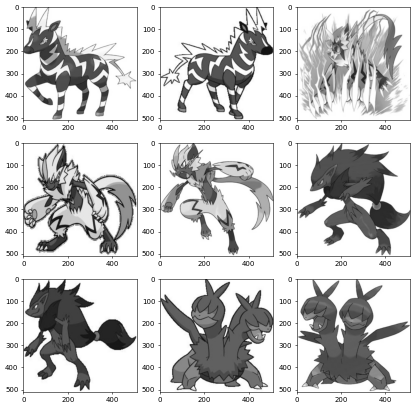

In [ ]:
t1=time.time()
plt.figure(num=None, figsize=(10, 10), dpi=50, facecolor='w', edgecolor='k')
t = tqdm(range(9)) #we have taken 9 images and plot them into 3by 3 grid
for i in t:
    img = cv2.imread(ls[i],0)
    img = crop(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #cv2.imshow('img1', img1)
    #cv2.imshow('img', img)
    #cv2.waitKey()
    #cv2.destroyAllWindows()
    plt.subplot(331+i)
    plt.imshow(img[:,:,:])
t2=time.time()
t2-t1
# this piece is basically going to visualize the images in the dataset, it is converted into grey

ML: 100%|██████████| 9/9 [00:00<00:00, 33.22it/s]


0.2721068859100342

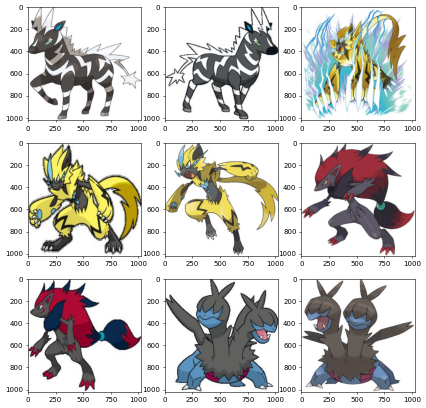

In [ ]:
t = tqdm(range(9), desc='ML')
t1=time.time()
plt.figure(num=None, figsize=(10, 10), dpi=50, facecolor='w', edgecolor='k')
size = 1024
for i in t:
    img = cv2.imread(ls[i],1)
    img = crop(img,1024)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #cv2.imshow('img1', img1)
    #cv2.imshow('img', img)
    #cv2.waitKey()
    #cv2.destroyAllWindows()
    plt.subplot(331+i)
    plt.imshow(img[:,:,:])
t2=time.time()
t2-t1 #this piece of code colouroizes the dataset, we can see the type of images in dataset

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 512, 512, 2)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512, 512, 3)    │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          3,136 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 256, 256, 64)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 128)  │        131,200 │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 128)  │            512 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 128, 128, 128)  │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 256)    │        524,544 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 256)    │          1,024 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 64, 64, 256)    │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 512)    │      2,097,664 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 512)    │          2,048 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 32, 32, 512)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 1024)   │      8,389,632 │ leaky_re_lu_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 16, 16, 1024)   │          4,096 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyR

 Total params: 27,952,577 (106.63 MB)

 Trainable params: 27,946,689 (106.61 MB)

 Non-trainable params: 5,888 (23.00 KB)

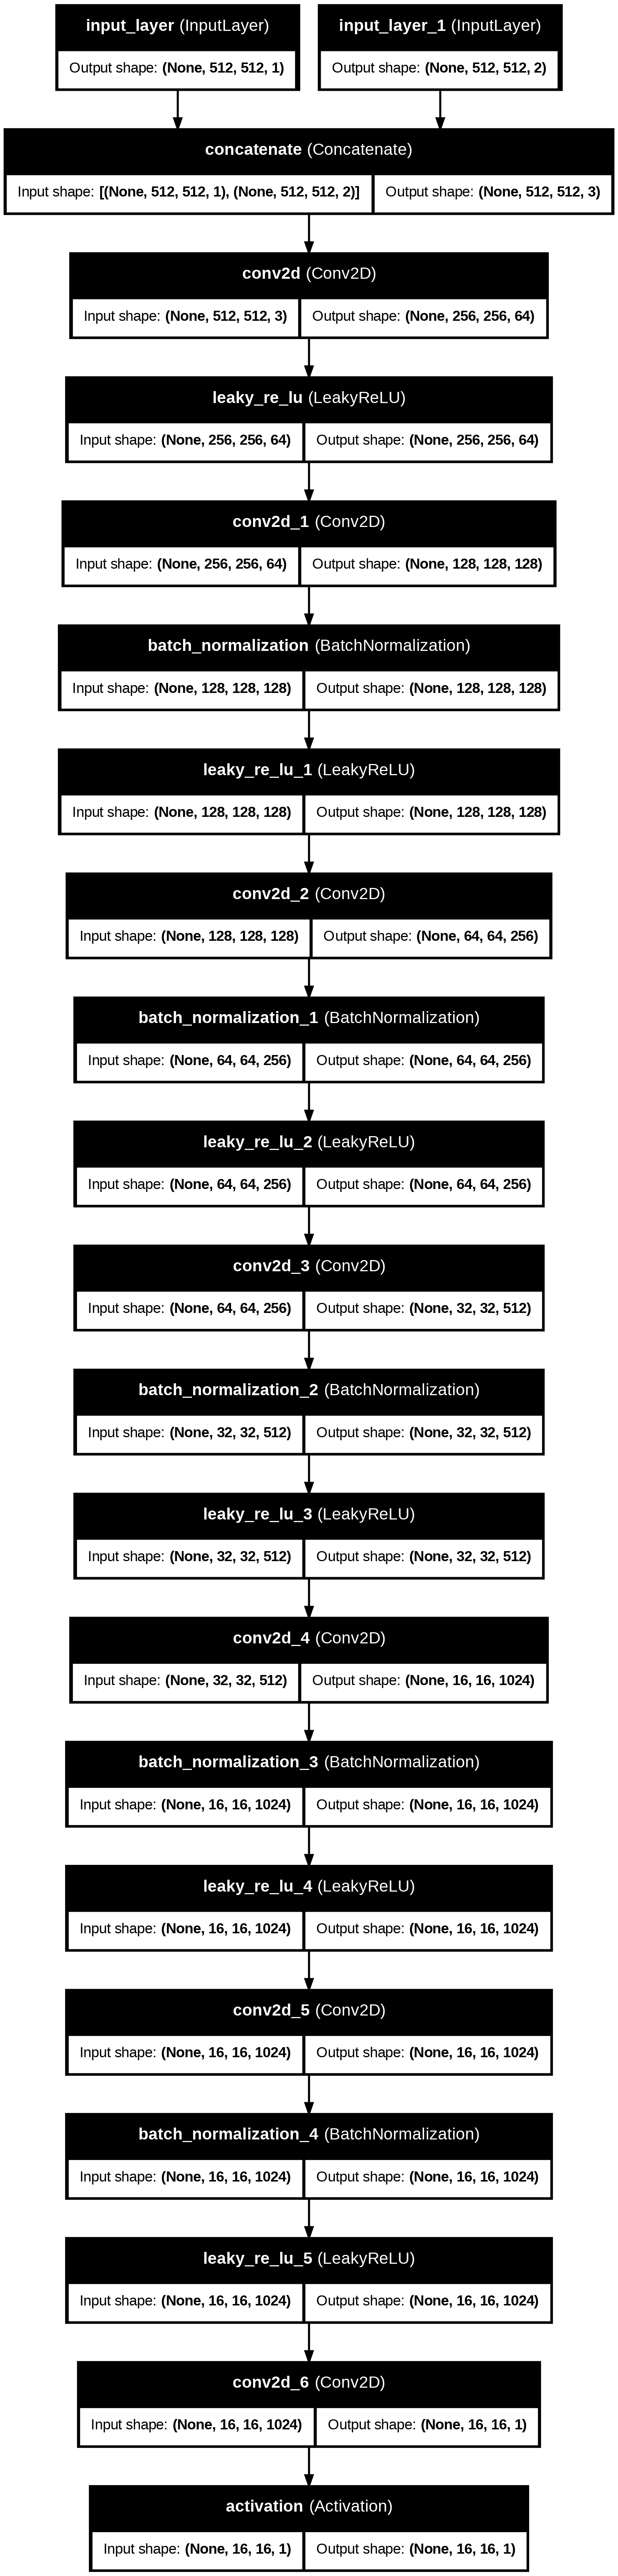

In [ ]:
# define the discriminator model
def define_discriminator(g_image_shape, d_image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_src_image = Input(shape=g_image_shape)
    # target image input
    in_target_image = Input(shape=d_image_shape)
    # concatenate images channel-wise
    merged = Concatenate()([in_src_image, in_target_image])
    # C64 this the number of blocks, as they increase the size of image decreases.
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C256
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C512
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C1024
    d = Conv2D(1024, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # second last output layer
    d = Conv2D(1024, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    # define model
    model = Model([in_src_image, in_target_image], patch_out)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)#gradient is multiplied by lr
    model.compile(loss='binary_crossentropy', optimizer=opt,)
    return model

# define image shape
g_image_shape = (512,512,1)
d_image_shape = (512,512,2)
# create the model
model = define_discriminator(g_image_shape, d_image_shape)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# example of defining a u-net encoder-decoder generator model
# we tested on the above two codes and we found out that this code is better, skip connection is the difference, we add connection between first and last layer for easy infor gathering
from keras.initializers import RandomNormal
from keras.models import Model
from keras import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.utils import plot_model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # add batch normalization
    g = BatchNormalization()(g, training=True)
    # conditionally add dropout
    if dropout:
        g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    # relu activation
    g = Activation('relu')(g)
    return g

# define the standalone generator model
def define_generator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model: C64-C128-C256-C512-C512-C512-C512-C512-C512
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 256)
    e4 = define_encoder_block(e3, 512)
    e5 = define_encoder_block(e4, 512)
    e6 = define_encoder_block(e5, 512)
    e7 = define_encoder_block(e6, 512)
    e8 = define_encoder_block(e7, 512)
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e8)
    b = Activation('relu')(b)
    # decoder model: CD512-CD1024-CD1024-CD1024-C1024-C1024-C512-C256-C128
    d0 = decoder_block(b, e8, 512)
    d1 = decoder_block(d0, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    # output
    g = Conv2DTranspose(2, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model

# define image shape
image_shape = (512,512,1)
# create the model
model = define_generator(image_shape)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_model_plot.png', show_shapes=True, show_layer_names=True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 512, 512, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 256, 256, 64)   │          1,088 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_6 (LeakyReLU) │ (None, 256, 256, 64)   │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 128)  │        131,200 │ leaky_re_lu_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 128, 128, 128)  │            512 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_7 (LeakyReLU) │ (None, 128, 128, 128)  │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 256)    │        524,544 │ leaky_re_lu_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 64, 64, 256)    │          1,024 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_8 (LeakyReLU) │ (None, 64, 64, 256)    │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 512)    │      2,097,664 │ leaky_re_lu_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 32, 32, 512)    │          2,048 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_9 (LeakyReLU) │ (None, 32, 32, 512)    │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 16, 16, 512)    │      4,194,816 │ leaky_re_lu_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 16, 16, 512)    │          2,048 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_10            │ (None, 16, 16, 512)    │              0 │ batch_normalization_8… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 8, 8, 512)      │      4,194,816 │ leaky_re_lu_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9

 Total params: 67,013,250 (255.64 MB)

 Trainable params: 67,001,346 (255.59 MB)

 Non-trainable params: 11,904 (46.50 KB)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 512, 512, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_3 (Functional) │ (None, 512, 512, 2)    │     67,013,250 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_2 (Functional) │ (None, 16, 16, 1)      │     27,952,577 │ input_layer_6[0][0],   │
│                           │                        │                │ functional_3[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 94,965,827 (362.27 MB)

 Trainable params: 67,001,346 (255.59 MB)

 Non-trainable params: 27,964,481 (106.68 MB)

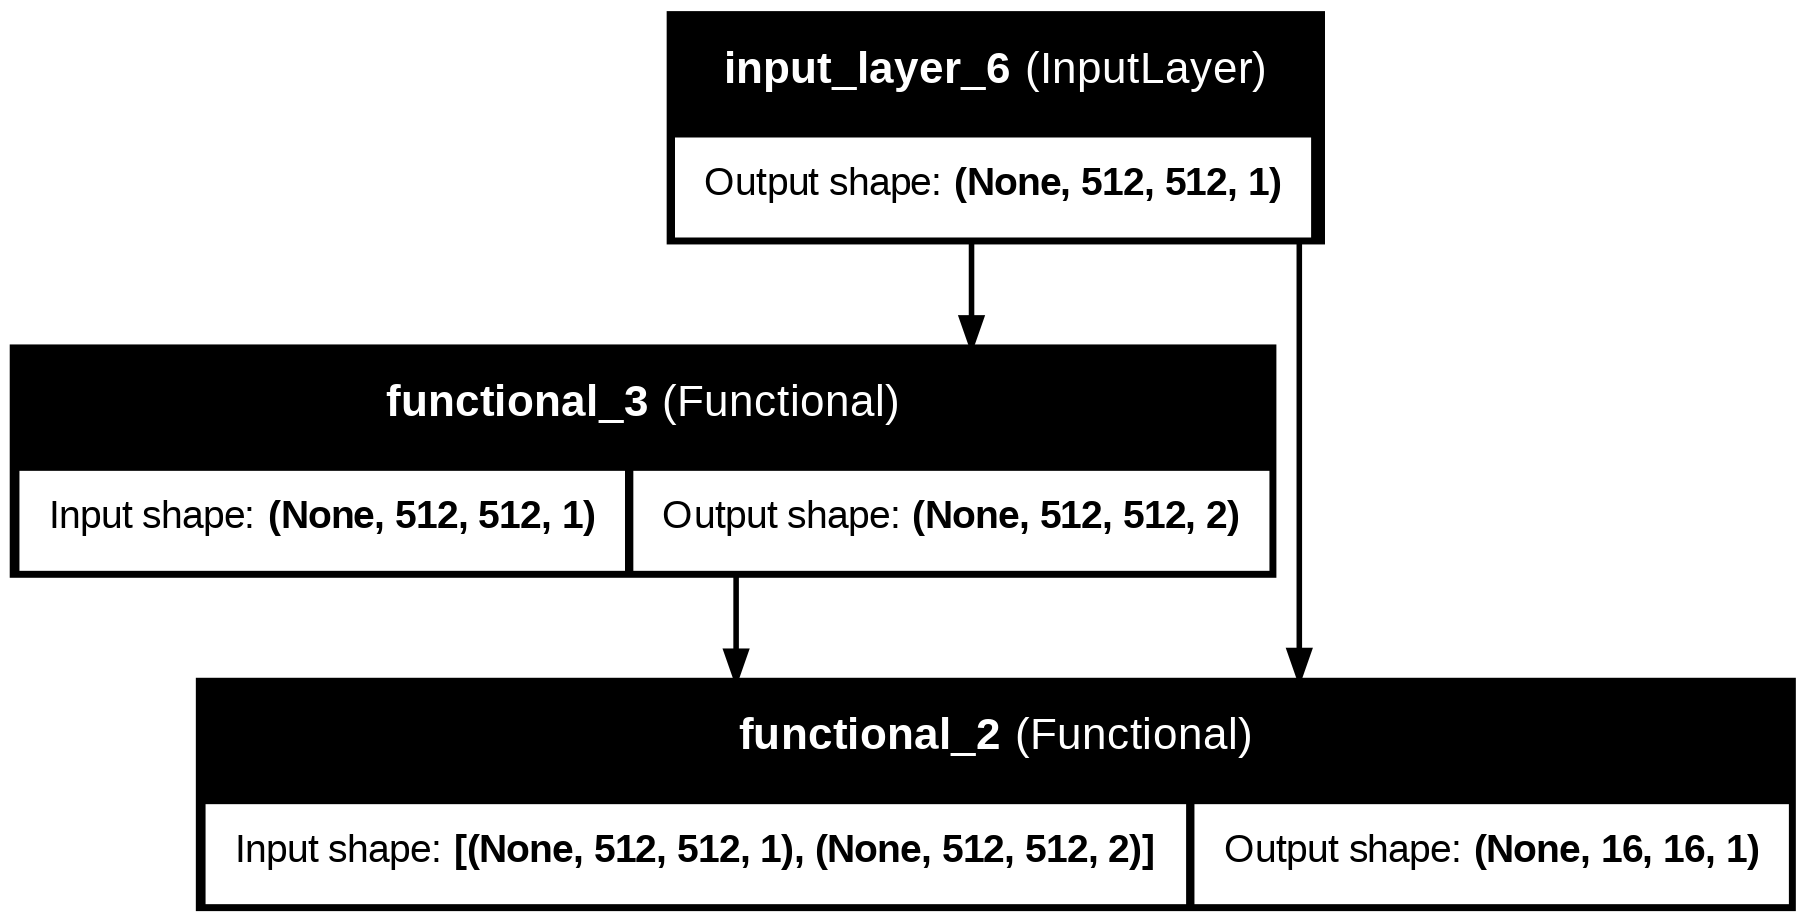

In [ ]:
#combination of generator and discriminator
def define_gan(g_model, d_model, g_image_shape, d_image_shape):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # define the source image
    in_src = Input(shape=g_image_shape)
    # connect the source image to the generator input
    gen_out = g_model(in_src)
    # connect the source input and generator output to the discriminator input
    dis_out = d_model([in_src, gen_out])
    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
    return model

# define image shape
g_image_shape = (512,512,1)
d_image_shape = (512,512,2)
# define the models
d_model = define_discriminator(g_image_shape, d_image_shape)
opt = Adam(learning_rate=0.0002, beta_1=0.5)
d_model.compile(loss='binary_crossentropy', optimizer=opt,)
g_model = define_generator(g_image_shape)

# define the composite model
gan_model = define_gan(g_model, d_model, g_image_shape, d_image_shape)
# summarize the model
gan_model.summary()
# plot the model
plot_model(gan_model, to_file='gan_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# select a batch of random samples, returns images and target, gives random batches of images
def generate_real_samples(ls, n_samples, patch_shape):
    # unpack dataset
    X1, X2 = np.zeros((n_samples,512,512,1), dtype = 'float64'), np.zeros((n_samples,512,512,2), dtype = 'float64')
    img_ran = random.sample(range(0, len(ls)), n_samples)
    for i in range(n_samples):
        img_name = ls[img_ran[i]]
        img = cv2.imread(img_name)
        img = crop(img)
        #print("Real_image",img.max(), img.min())
        img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
        X1[i,:,:,:] = img_lab[:,:,0:1]
        X2[i,:,:,:] = img_lab[:,:,1:]
    X1 = X1/127.5 -1
    X2 = X2/127.5 -1
    y = np.ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y


# generate a batch of images, returns images and targets, generates colourized images from generator
def generate_fake_samples(g_model, samples, patch_shape):
    # generate fake instance
    X = g_model.predict(samples)
    # create 'fake' class labels (0)
    y = np.zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

In [ ]:
#this code is used to test the performance of the model
def summarize_performance(step, g_model, d_model, ls, n_patch, n_batch=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(ls, n_batch, n_patch)
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, n_patch)
    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) * 127.5
    X_realB = (X_realB + 1) * 127.5
    X_fakeB = (X_fakeB + 1) * 127.5

    X_realA = np.array(X_realA, dtype='uint8')
    X_realB = np.array(X_realB, dtype='uint8')
    X_fakeB = np.array(X_fakeB, dtype='uint8')

    # plot real source images
    plt.figure(figsize=(15,15), dpi=70, constrained_layout=True)
    n_samples = 3
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + i)
        plt.axis('off')
        plt.imshow(X_realA[i,:,:,0], cmap='gray')

    # plot generated target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples + i)
        plt.axis('off')
        img = np.concatenate((X_realA[i],X_realB[i]), axis=2)
        img = cv2.cvtColor(img, cv2.COLOR_Lab2RGB)
        plt.imshow(img)

    # plot real target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples*2 + i)
        plt.axis('off')
        img = np.concatenate((X_realA[i],X_fakeB[i]), axis=2)
        img = cv2.cvtColor(img, cv2.COLOR_Lab2RGB)
        plt.imshow(img)

    # save plot to file
    import os
    os.makedirs('/content/drive/MyDrive/archive/plot_unet', exist_ok=True)#it will create folder/directory
    filename1 = '/content/drive/MyDrive/archive/plot_unet/plot_%02d.png' % (step)
    plt.savefig(filename1)
    plt.close()
    # save the generator model
    if (step)%5000==0:
        filename_gan = '/content/drive/MyDrive/archive/model_unet_gan/model_%02d.h5' % (step)
        filename_dis = '/content/drive/MyDrive/archive/model_unet_dis/model_%02d.h5' % (step)
        g_model.save(filename_gan)
        d_model.save(filename_dis)
        #print('>Saved: %s' % (filename2))
    #print('>Saved: %s' % (filename1))


In [ ]:
# train pix2pix models
#this is main training loop and above is a helper function. This code used the functions used above.
def train(d_model, g_model, gan_model, ls, start, n_epochs=100, n_batch=1, n_patch=16):
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(ls) / n_batch)
    # calculate the number of training iterations
    n_steps = 100000
    # manually enumerate epochs
    t = tqdm(range(n_steps), desc='ML')
    sample_interval=200

    for i in t:
        # select a batch of real samples
        [X_realA, X_realB], y_real = generate_real_samples(ls, n_batch, n_patch)
        # generate a batch of fake samples
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        # update discriminator for real samples
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        # update discriminator for generated samples
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        # update the generator
        g_loss, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        # summarize performance
        #print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
        #print(i+1, d_loss1, d_loss2, g_loss)
        t.set_description('>%d, d1[%.4f] d2[%.4f] g[%.4f]' % (i+1, d_loss1, d_loss2, g_loss))

        if i%2==0:
            d_model.trainable=True
            g_model.trainable=False
            #print("D_model = True, G_model = False");
            #we cannot train discriminator and generator model together because it hinders conversion, hence this loop stops one model at the time to train another one.

        elif i%1==0:
            d_model.trainable=False
            g_model.trainable=True
            #print("D_model = False, G_model = True");

        if (start+i) % (sample_interval) == 0:
            summarize_performance(start+i, g_model, d_model,ls, n_patch)

In [ ]:
train(d_model, g_model, gan_model, ls, 0) #called the function above to begin the training.

ML:   0%|          | 0/100000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
>1, d1[0.6573] d2[0.6949] g[0.6949]:   0%|          | 0/100000 [00:37<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


>1, d1[0.6573] d2[0.6949] g[0.6949]:   0%|          | 1/100000 [01:08<1915:24:49, 68.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


>2, d1[0.6829] d2[0.6949] g[0.6949]:   0%|          | 2/100000 [01:12<841:23:58, 30.29s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


>3, d1[0.6859] d2[0.6948] g[0.6948]:   0%|          | 3/100000 [01:14<491:56:03, 17.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


>4, d1[0.6911] d2[0.6945] g[0.6945]:   0%|          | 4/100000 [01:17<324:48:48, 11.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>5, d1[0.6894] d2[0.6945] g[0.6945]:   0%|          | 5/100000 [01:19<229:38:08,  8.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


>6, d1[0.6912] d2[0.6944] g[0.6944]:   0%|          | 6/100000 [01:21<172:58:21,  6.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


>7, d1[0.6909] d2[0.6946] g[0.6946]:   0%|          | 7/100000 [01:23<135:51:48,  4.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


>8, d1[0.6913] d2[0.6945] g[0.6945]:   0%|          | 8/100000 [01:26<111:40:14,  4.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


>9, d1[0.6921] d2[0.6946] g[0.6946]:   0%|          | 9/100000 [01:28<101:29:29,  3.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


>10, d1[0.6927] d2[0.6947] g[0.6947]:   0%|          | 10/100000 [01:31<89:05:56,  3.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


>11, d1[0.6931] d2[0.6947] g[0.6947]:   0%|          | 11/100000 [01:33<81:22:15,  2.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>12, d1[0.6927] d2[0.6948] g[0.6948]:   0%|          | 12/100000 [01:36<78:16:33,  2.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>13, d1[0.6928] d2[0.6948] g[0.6948]:   0%|          | 13/100000 [01:38<72:09:10,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>14, d1[0.6934] d2[0.6947] g[0.6947]:   0%|          | 14/100000 [01:40<70:59:57,  2.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


>15, d1[0.6933] d2[0.6947] g[0.6947]:   0%|          | 15/100000 [01:43<74:10:52,  2.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>16, d1[0.6932] d2[0.6947] g[0.6947]:   0%|          | 16/100000 [01:45<69:26:10,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>17, d1[0.6936] d2[0.6947] g[0.6947]:   0%|          | 17/100000 [01:47<67:07:53,  2.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>18, d1[0.6935] d2[0.6947] g[0.6947]:   0%|          | 18/100000 [01:50<65:10:18,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>19, d1[0.6934] d2[0.6946] g[0.6946]:   0%|          | 19/100000 [01:52<63:24:17,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>20, d1[0.6936] d2[0.6946] g[0.6946]:   0%|          | 20/100000 [01:55<72:16:40,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


>21, d1[0.6934] d2[0.6945] g[0.6945]:   0%|          | 21/100000 [01:57<70:04:40,  2.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


>22, d1[0.6933] d2[0.6945] g[0.6945]:   0%|          | 22/100000 [02:00<67:34:14,  2.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>23, d1[0.6937] d2[0.6945] g[0.6945]:   0%|          | 23/100000 [02:02<65:30:30,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


>24, d1[0.6937] d2[0.6945] g[0.6945]:   0%|          | 24/100000 [02:04<64:47:44,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


>25, d1[0.6936] d2[0.6945] g[0.6945]:   0%|          | 25/100000 [02:06<64:36:44,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


>26, d1[0.6937] d2[0.6945] g[0.6945]:   0%|          | 26/100000 [02:09<69:43:53,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>27, d1[0.6937] d2[0.6945] g[0.6945]:   0%|          | 27/100000 [02:11<66:29:37,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


>28, d1[0.6936] d2[0.6945] g[0.6945]:   0%|          | 28/100000 [02:14<65:21:40,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


>29, d1[0.6937] d2[0.6945] g[0.6945]:   0%|          | 29/100000 [02:16<63:43:33,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


>30, d1[0.6937] d2[0.6945] g[0.6945]:   0%|          | 30/100000 [02:18<63:55:04,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>31, d1[0.6937] d2[0.6944] g[0.6944]:   0%|          | 31/100000 [02:21<66:00:19,  2.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


>32, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 32/100000 [02:24<70:59:52,  2.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


>33, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 33/100000 [02:26<67:53:42,  2.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>34, d1[0.6938] d2[0.6944] g[0.6944]:   0%|          | 34/100000 [02:28<65:44:15,  2.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


>35, d1[0.6938] d2[0.6944] g[0.6944]:   0%|          | 35/100000 [02:30<64:03:02,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>36, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 36/100000 [02:32<63:12:46,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


>37, d1[0.6938] d2[0.6944] g[0.6944]:   0%|          | 37/100000 [02:35<66:38:37,  2.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


>38, d1[0.6937] d2[0.6944] g[0.6944]:   0%|          | 38/100000 [02:38<69:26:50,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


>39, d1[0.6940] d2[0.6944] g[0.6944]:   0%|          | 39/100000 [02:40<66:53:27,  2.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>40, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 40/100000 [02:42<65:19:53,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


>41, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 41/100000 [02:44<63:57:50,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>42, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 42/100000 [02:47<62:42:36,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>43, d1[0.6938] d2[0.6944] g[0.6944]:   0%|          | 43/100000 [02:50<68:13:45,  2.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


>44, d1[0.6938] d2[0.6944] g[0.6944]:   0%|          | 44/100000 [02:52<68:59:55,  2.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>45, d1[0.6940] d2[0.6944] g[0.6944]:   0%|          | 45/100000 [02:54<66:33:51,  2.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>46, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 46/100000 [02:56<64:34:26,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


>47, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 47/100000 [02:59<66:24:33,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>48, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 48/100000 [03:01<66:23:29,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


>49, d1[0.6938] d2[0.6944] g[0.6944]:   0%|          | 49/100000 [03:04<71:18:41,  2.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


>50, d1[0.6941] d2[0.6944] g[0.6944]:   0%|          | 50/100000 [03:07<68:29:15,  2.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


>51, d1[0.6939] d2[0.6944] g[0.6944]:   0%|          | 51/100000 [03:09<65:42:12,  2.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>52, d1[0.6941] d2[0.6944] g[0.6944]:   0%|          | 52/100000 [03:11<64:59:52,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


>53, d1[0.6940] d2[0.6944] g[0.6944]:   0%|          | 53/100000 [03:13<64:09:49,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
